## Problem Statement: Perform sentimental analysis on the Elon-musk tweets

In [1]:
import numpy as np  
import pandas as pd 
import string    # special operations on strings
import spacy   #language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import wordcloud
%matplotlib inline

In [2]:
data = pd.read_csv('Elon_musk.csv')
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [4]:
data

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
data = [Text.strip() for Text in data.Text]  
data = [Text for Text in data if Text]   
data[0:10]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [6]:
# Joining the list into one string/text
text='  '.join(data)
text

'@kunalb11 I�m an alien  @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?  @joerogan @Spotify Great interview!  @gtera27 Doge is underestimated  @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!  Happy New Year of the Ox! https://t.co/9WFKMYu2oj  Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM  @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)  @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.  The most entertaining outcome is the most likely  @GiveDirectly Just sent some  Just agree to do Clubhouse with @kanyewest  https://t.co/3rWE9uHSTS  @geoffkeighley @UnrealEngine It�s getting real  Bought some Dogecoin for lil X, so he can be a toddler hodler  @JoshManMode He definitely has issues, but the sentencing seems a bit high  @freewalletorg Thanks for fixing  @freewalletorg Please unlock my account  @AstroJordy <U

In [7]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer

In [8]:
ttz=TweetTokenizer(strip_handles=True)
tweet_token=ttz.tokenize(text)
print(tweet_token)

['I', '�', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '�', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be'

In [9]:
# Again Joining the list into one string/text
tweet_token_text=' '.join(tweet_token)
tweet_token_text

'I � m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It � s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won � t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch th

In [10]:
# Remove Punctuations 
no_punc=tweet_token_text.translate(str.maketrans('','',string.punctuation))
len(no_punc)

113477

In [11]:
# remove https or url within text
import re
tweet=re.sub(r'http\s+', '',no_punc)

In [12]:
tweet

'I � m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It � s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won � t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway tog

In [13]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(tweet)
print(text_tokens[0:50])

['I', '�', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All']


In [14]:
len(text_tokens)

19011

In [15]:
# Normalize the data
lower_words = [x.lower() for x in text_tokens]
print(lower_words)

['i', '�', 'm', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'httpstcozgxjfdzzrm', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'httpstco3rwe9uhsts', 'it', '�', 's', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sentenci

In [16]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [17]:
#Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

list = ['\x92','rt','ye','yeah','haha','Yes','u0001f923','u0001f5a4']
my_stop_words.extend(list)
len(my_stop_words)

187

In [18]:
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
no_stop_words = [word for word in lower_words if not word in my_stop_words]
print(no_stop_words[0:40])

['�', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation']


In [20]:
len(no_stop_words)

11923

In [21]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [22]:
stemmed_tokens = [ps.stem(word) for word in no_stop_words]
print(stemmed_tokens[0:50])

['�', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'entertain', 'outcom', 'like', 'sent', 'agre', 'clubhous', 'httpstco3rwe9uhst', '�', 'get', 'real']


In [23]:
nlp = spacy.load('en_core_web_md')
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:40])

� alien ray trace cyberpunk hdr nextlevel tri great interview doge underestim congratul tesla china amaz execut last year next even happi new year ox httpstco9wfkmyu2oj frodo underdog thought would fail httpstcozgxjfdzzrm thank inde tweet definit repres realworld time alloc


In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:50])

['�', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'think', 'would', 'fail', 'httpstcozgxjfdzzrm', 'thank', 'inde', 'tweet', 'definit', 'repre', 'realworld', 'time', 'alloc', 'entertain', 'outcom', 'like', 'send', 'agre', 'clubhous', 'httpstco3rwe9uhst', '�', 'get', 'real']


In [25]:
clean = ' '.join(lemmas)
clean

'� alien ray trace cyberpunk hdr nextlevel tri great interview doge underestim congratul tesla china amaz execut last year next even happi new year ox httpstco9wfkmyu2oj frodo underdog think would fail httpstcozgxjfdzzrm thank inde tweet definit repre realworld time alloc entertain outcom like send agre clubhous httpstco3rwe9uhst � get real buy dogecoin lil x toddler hodler definit issu sentenc seem bit high thank fix plea unlock account true power httpstcofc9uhqsd7o crypto wallet � give privat key avoid cost app suck nasa select falcon heavi launch first two element lunar gateway togeth one mission httpstco3pwt � ye predict cash flow reason well starlink ipo starlink staggeringli difficult technic econom endeavor howev � httpstco9z8ac6skqx spacex need pass deep chasm neg cash flow next year � httpstco7j1c92hdjl low cost per ton carbon sequ net valu product make must scalabl g � httpstcoxmyi7qwsgw � mean price countri differ tax ship intend earth may idea appli mar xprize team manag 10

### Feature Extraction

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [27]:
print(vectorizer.vocabulary_)

{'alien': 181, 'ray': 2776, 'trace': 3392, 'cyberpunk': 704, 'hdr': 1246, 'nextlevel': 2431, 'tri': 3409, 'great': 1200, 'interview': 2059, 'doge': 817, 'underestim': 3551, 'congratul': 620, 'tesla': 3314, 'china': 535, 'amaz': 201, 'execut': 963, 'last': 2138, 'year': 3747, 'next': 2430, 'even': 942, 'happi': 1231, 'new': 2428, 'ox': 2538, 'httpstco9wfkmyu2oj': 1415, 'frodo': 1109, 'underdog': 3550, 'think': 3334, 'would': 3734, 'fail': 997, 'httpstcozgxjfdzzrm': 1948, 'thank': 3322, 'inde': 2016, 'tweet': 3435, 'definit': 741, 'repre': 2833, 'realworld': 2789, 'time': 3354, 'alloc': 183, 'entertain': 915, 'outcom': 2518, 'like': 2189, 'send': 2970, 'agre': 166, 'clubhous': 564, 'httpstco3rwe9uhst': 1353, 'get': 1160, 'real': 2784, 'buy': 460, 'dogecoin': 819, 'lil': 2190, 'toddler': 3365, 'hodler': 1286, 'issu': 2076, 'sentenc': 2974, 'seem': 2962, 'bit': 384, 'high': 1275, 'fix': 1055, 'plea': 2628, 'unlock': 3572, 'account': 130, 'true': 3418, 'power': 2660, 'httpstcofc9uhqsd7o': 1

In [28]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['250kw', '25gunsteslacom', '25k', '25th', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445', '448', '4530', '4680', '479000', '48', '4d', '4th', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(X.toarray().shape)

(11966, 3763)


### CountVectorizer with N-grams (Bigrams & Trigrams)

In [30]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [31]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['absolut', 'actual', 'ai', 'also', 'back', 'big', 'booster', 'build', 'car', 'come', 'complet', 'cool', 'could', 'crew', 'day', 'design', 'differ', 'dragon', 'earth', 'engin', 'even', 'ever', 'exactli', 'falcon', 'fire', 'first', 'flight', 'fsd', 'futur', 'get', 'go', 'good', 'great', 'hard', 'high', 'hope', 'improv', 'land', 'launch', 'life', 'like', 'look', 'lot', 'love', 'make', 'mani', 'mar', 'mayb', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'ok', 'one', 'orbit', 'part', 'peopl', 'point', 'possibl', 'pretti', 'probabl', 'product', 'right', 'rocket', 'say', 'seem', 'soon', 'sound', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'team', 'tesla', 'test', 'thank', 'thing', 'think', 'time', 'tri', 'true', 'u0001f525', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'work', 'would', 'ye', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### TF-IDF vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), 
                                                 max_features = 500)

In [34]:
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)

In [35]:
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '13', '20', '2020', '30', '40', '60', 'abl', 'absolut', 'acceler', 'access', 'accur', 'achiev', 'actual', 'ad', 'advanc', 'ago', 'agre', 'ai', 'aim', 'air', 'almost', 'alreadi', 'also', 'although', 'alway', 'amaz', 'anoth', 'appear', 'appli', 'appreci', 'approv', 'approxim', 'arm', 'around', 'articl', 'astronaut', 'automat', 'autopilot', 'awesom', 'back', 'bad', 'bar', 'base', 'batteri', 'becom', 'berlin', 'beta', 'big', 'bit', 'boca', 'bodi', 'booster', 'brain', 'build', 'burn', 'buy', 'cake', 'call', 'camera', 'car', 'cargo', 'cast', 'catch', 'cell', 'ch4', 'chanc', 'chang', 'china', 'civil', 'close', 'cold', 'color', 'come', 'commun', 'compani', 'complet', 'comput', 'confirm', 'congratul', 'continu', 'control', 'convert', 'cool', 'cost', 'could', 'cour', 'cov', 'crazi', 'creat', 'crew', 'critic', 'curevac', 'current', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definit', 'deliveri', 'depend', 'design', 'detail', 'develop', 'differ', 'direct', 'do', 'dock', 'dog

### Generate wordcloud

In [36]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [37]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

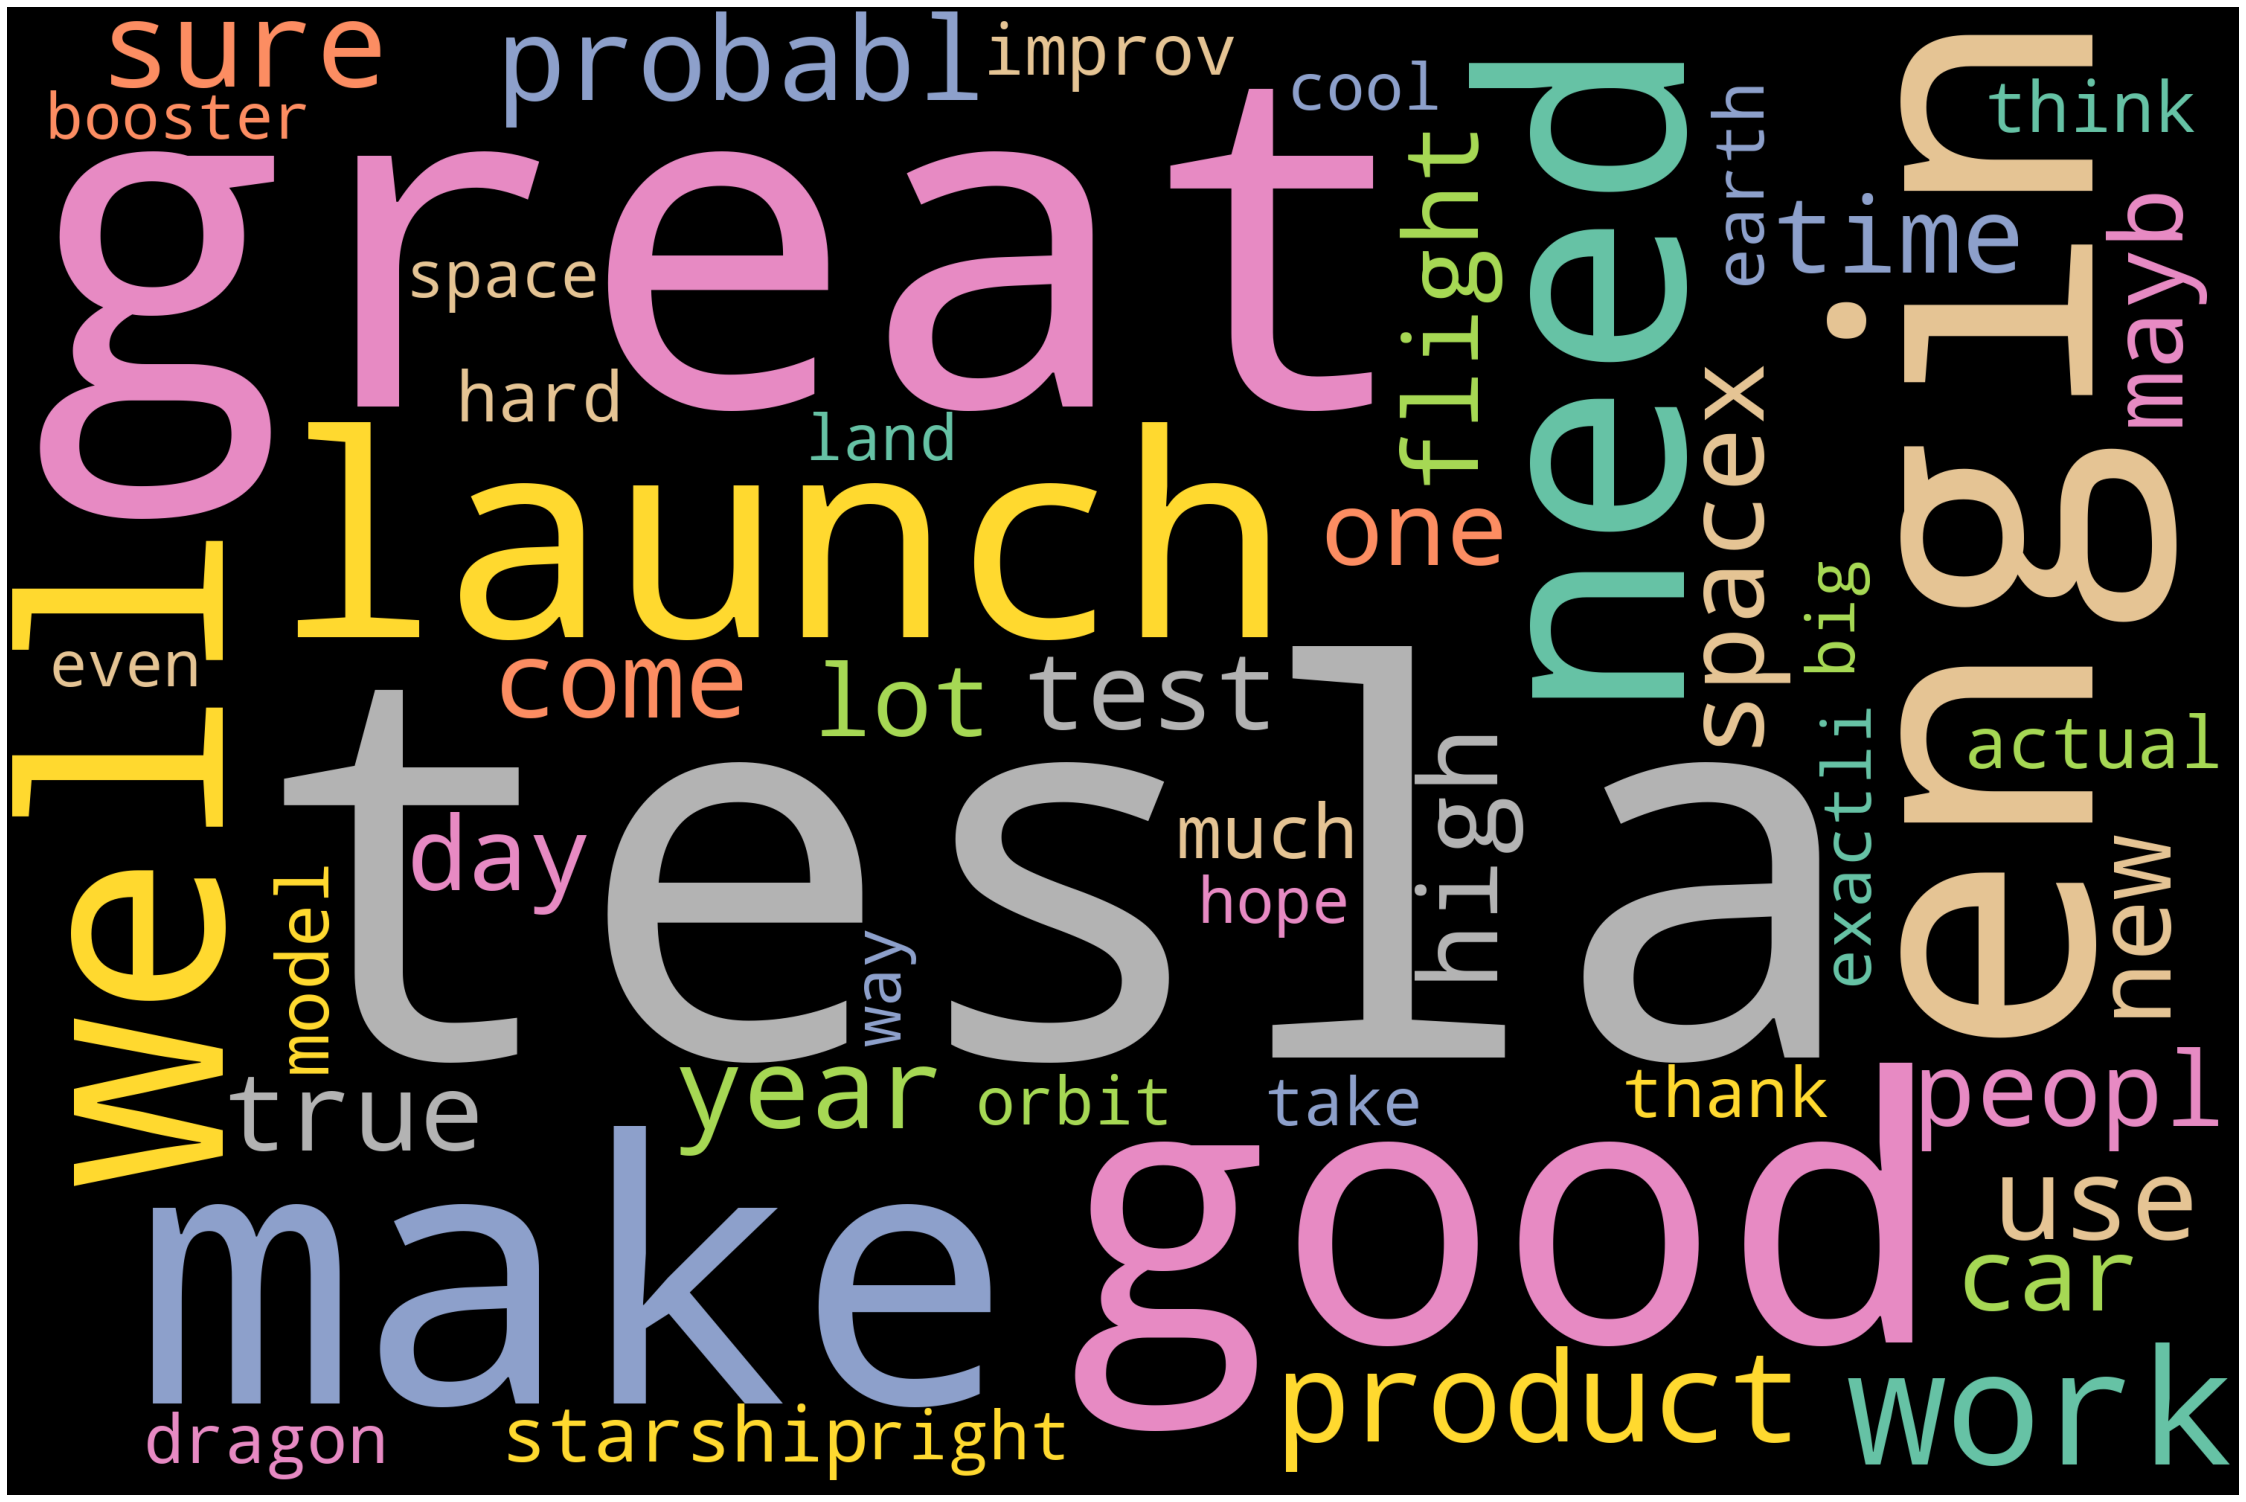

In [38]:
# Generate wordcloud
#my_stop_words = STOPWORDS
STOPWORDS.add('haha')
STOPWORDS.add('go')
STOPWORDS.add('ye')

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=50,
                      colormap='Set2',stopwords=STOPWORDS).generate(clean)
# Plot
plot_cloud(wordcloud)

### Named Entity Recognition

In [39]:
# POS Tagging
nlp = spacy.load('en_core_web_md')
one_block = clean
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [40]:
doc_block

� alien ray trace cyberpunk hdr nextlevel tri great interview doge underestim congratul tesla china amaz execut last year next even happi new year ox httpstco9wfkmyu2oj frodo underdog think would fail httpstcozgxjfdzzrm thank inde tweet definit repre realworld time alloc entertain outcom like send agre clubhous httpstco3rwe9uhst � get real buy dogecoin lil x toddler hodler definit issu sentenc seem bit high thank fix plea unlock account true power httpstcofc9uhqsd7o crypto wallet � give privat key avoid cost app suck nasa select falcon heavi launch first two element lunar gateway togeth one mission httpstco3pwt � ye predict cash flow reason well starlink ipo starlink staggeringli difficult technic econom endeavor howev � httpstco9z8ac6skqx spacex need pass deep chasm neg cash flow next year � httpstco7j1c92hdjl low cost per ton carbon sequ net valu product make must scalabl g � httpstcoxmyi7qwsgw � mean price countri differ tax ship intend earth may idea appli mar xprize team manag 100

In [41]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improv', 'ship', 'booster', 'work', 'tonight', 'ogecoin', 'instruct', 'video', 'httpstcoueeocofctb', 'peopl', 'speak', 'httpstcox41ovmztgo', 'mislead', 'reflect', 'time', 'cost', 'peopl', 'rain', 'pain', 'u0001f3b6', 'let', 'rainfor', 'come', 'fun', 'simplic', 'easi', 'decad', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'time', 'tell', 'read', 'great', 'kingdom', 'hear', 'name', 'year', 'yolt', 'thing', 'restaur', 'get', 'hang', 'earth', 'scratch', 'say', 'ship', 'land', 'burn', 'solut', 'httpstcoe5wikiugkz', 'use', 'httpstcovso9h4io', 'isp', 'intuit', 'seem', 'turbopumpf', 'raptor', 'mu', 'httpstcolbtg1sibuc', 'falcon', 'launch', 'mission', 'collect', 'falcon', 'launch', 'starlink', 'satellit', 'orbit', 'mission', 'pad', 'deck', 'default', 'engin', 'lever', 'arm', 'shut', 'ye', 'engin', 'min', 'throttl', 'point', 'flameout', 'risk', 'start', 'engin', 'immedi', 'shut', 'need', 'land', 'destroy']


### Emotion Mining

In [42]:
afinn = pd.read_csv('C:\\Users\\User\\Documents\\ExcelR\\Datasets\\Afinn.csv')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [43]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [44]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences

['@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [45]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [46]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [47]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [48]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [49]:
# test that it works
calculate_sentiment(text = 'ability')

2

In [50]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [51]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [52]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",11,85
149,"@GUNMTLM3 @lexfridman No, but definitely this ...",11,45
222,"@PPathole @karpathy For a second there, I thou...",11,69
182,"Also, w� https://t.co/IYdKttVsqk @cleantechnic...",12,99
638,It�s� https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
80,@teslaownersSV This is a good one @MrBeastYT I...,13,38
578,The �open� areas� https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94
710,We just haven�t observed the� https://t.co/mez...,17,72


In [53]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.427790
std        2.731852
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [54]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
8,Tweets definitely do not represent real-world ...,0,8


In [55]:
sent_df[sent_df['sentiment_value']<-5]

,sentence,sentiment_value,word_count
64,"Also, the road to hell is mostly paved with ba...",-7,11
640,Very ba� https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
828,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61


In [56]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [57]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11,909
910,"It may never pay out, as the stock can�t b� ht...",-4,31,910
911,Details Aug 28.,0,3,911
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,912


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

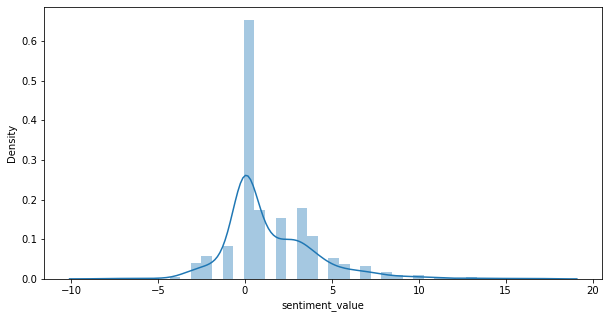

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

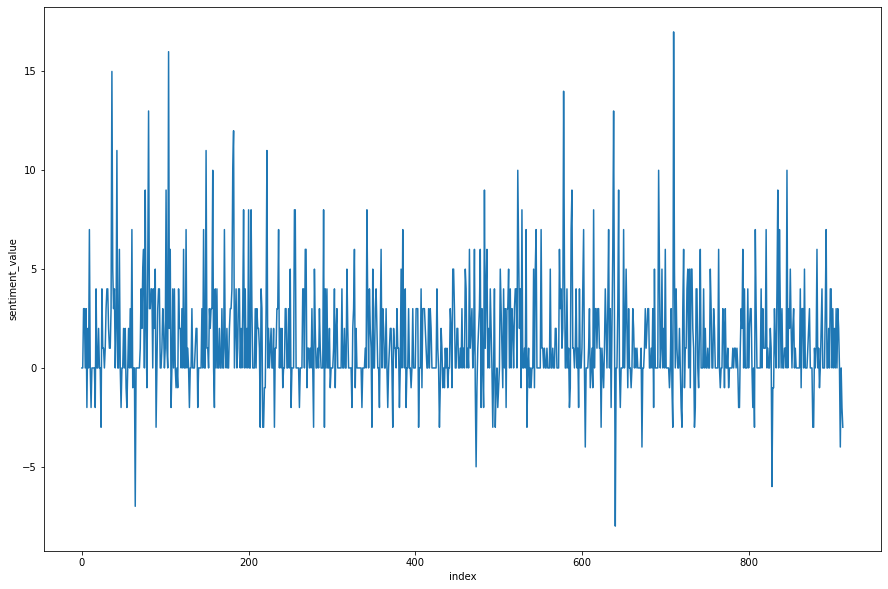

In [59]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

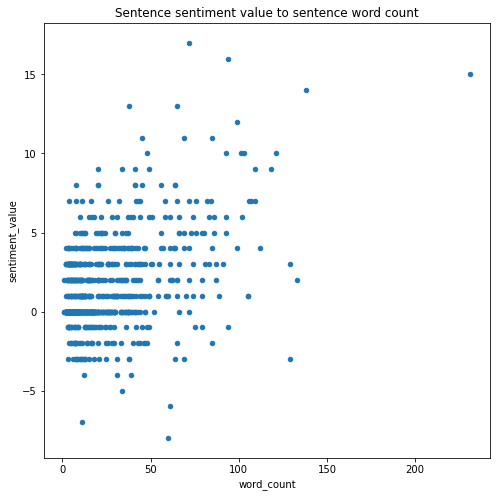

In [60]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

### Thus we can say that positive tweets are much more as compared to negative tweets.